# Modern Image





## Problem review

Sergey Prokudin-Gorsky was the first color photographer.Each of his photographs is three black-and-white photo plates, corresponding to red, green, and blue color channels.  In this project, making a programme which will change the images from the Prokudin-Gorsky plates.

In [0]:
%pylab inline
import matplotlib.pyplot as plt 
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Problem description

#### Input image loading

The input image is the set of 3 plates, corresponding to B, G, and R channels (top-down). Function $\tt{load}$\_$\tt{data}$ : reads the data and returns the list of images of plates.
$\tt{dir}$\_$\tt{name}$ is the path to the directory with plate images. 

In [0]:
import glob
from scipy import ndimage
import math

In [0]:
def load_data(dir_name = '/content/plates'):
    load_d = []
    for i in glob.glob(dir_name + '/*.png'):
        load_d.append(ndimage.imread(i)[:,:,0])
    return load_d
   
    pass

plates = load_data()
plates

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 254, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 253, 254, 255]], dtype=uint8),
 array([[251, 251, 251, ..., 251, 252, 252],
        [251, 251, 251, ..., 252, 251, 251],
        [251, 251, 251, ..., 252, 252, 252],
        ...,
        [252, 251, 251, ..., 251, 251, 252],
        [251, 252, 251, ..., 252, 252, 252],
        [251, 252, 251, ..., 251, 251, 252]], dtype=uint8),
 array([[255, 255, 254, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 254, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[249, 248, 248, ..., 248, 249, 249],
        [249, 248, 248, ..., 247, 249, 248],
        [248, 24

The dataset is a list of 2-dimensional arrays.

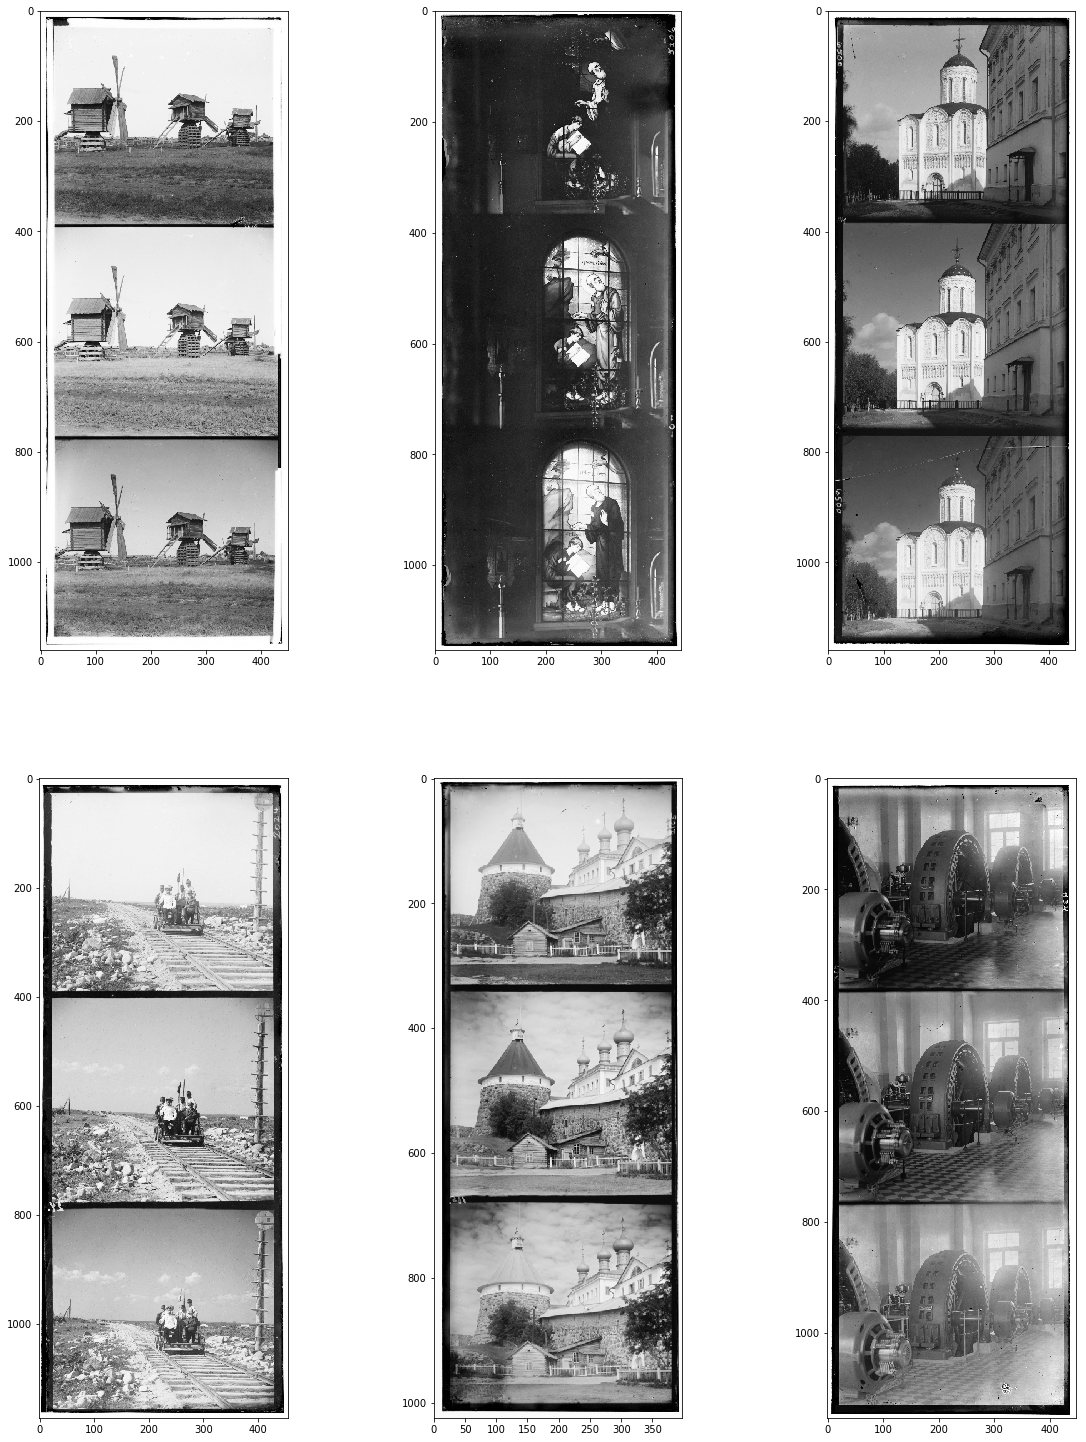

In [0]:
def visualize(imgs, format=None):
    plt.figure(figsize=(20, 40))
    for i, img in enumerate(imgs):
        if img.shape[0] == 3:
            img = img.transpose(1,2,0)
        plt_idx = i+1
        plt.subplot(3, 3, plt_idx)    
        plt.imshow(img, cmap=format)
    plt.show()

visualize(plates, 'gray')

#### The borders removal 
Using   Canny edge detector to remove the borders of images. The example of using Canny detector implemented in skimage library can be found [here](http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html).<br>



#### Canny detector implementation  
Canny detection algorithm:
1. *Noise reduction.* To remove noise, the image is smoothed by Gaussian blur with the kernel of size $5 \times 5$ and $\sigma = 1.4$. Since the sum of the elements in the Gaussian kernel equals $1$, the kernel should be normalized before the convolution. <br><br>

2. *Calculating gradients.* When the image $I$ is smoothed, the derivatives $I_x$ and $I_y$ w.r.t. $x$ and $y$ are calculated. It can be implemented by convolving $I$ with Sobel kernels $K_x$ and $K_y$, respectively: 
$$ K_x = \begin{pmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{pmatrix}, K_y = \begin{pmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{pmatrix}. $$ 
Then, the magnitude $G$ and the slope $\theta$ of the gradient are calculated:
$$ |G| = \sqrt{I_x^2 + I_y^2}, $$
$$ \theta(x,y) = arctan\left(\frac{I_y}{I_x}\right)$$<br><br>

3. *Non-maximum suppression.* For each pixel find two neighbors (in the positive and negative gradient directions, supposing that each neighbor occupies the angle of $\pi /4$, and $0$ is the direction straight to the right). If the magnitude of the current pixel is greater than the magnitudes of the neighbors, nothing changes, otherwise, the magnitude of the current pixel is set to zero.<br><br>

4. *Double threshold.* The gradient magnitudes are compared with two specified threshold values, the first one is less than the second. The gradients that are smaller than the low threshold value are suppressed; the gradients higher than the high threshold value are marked as strong ones and the corresponding pixels are included in the final edge map. All the rest gradients are marked as weak ones and pixels corresponding to these gradients are considered in the next step.<br><br>

5. *Edge tracking by hysteresis.* Since a weak edge pixel caused from true edges will be connected to a strong edge pixel, pixel $w$ with weak gradient is marked as edge and included in the final edge map if and only if it is involved in the same blob (connected component) as some pixel $s$ with strong gradient. In other words, there should be a chain of neighbor weak pixels connecting $w$ and $s$ (the neighbors are 8 pixels around the considered one). 

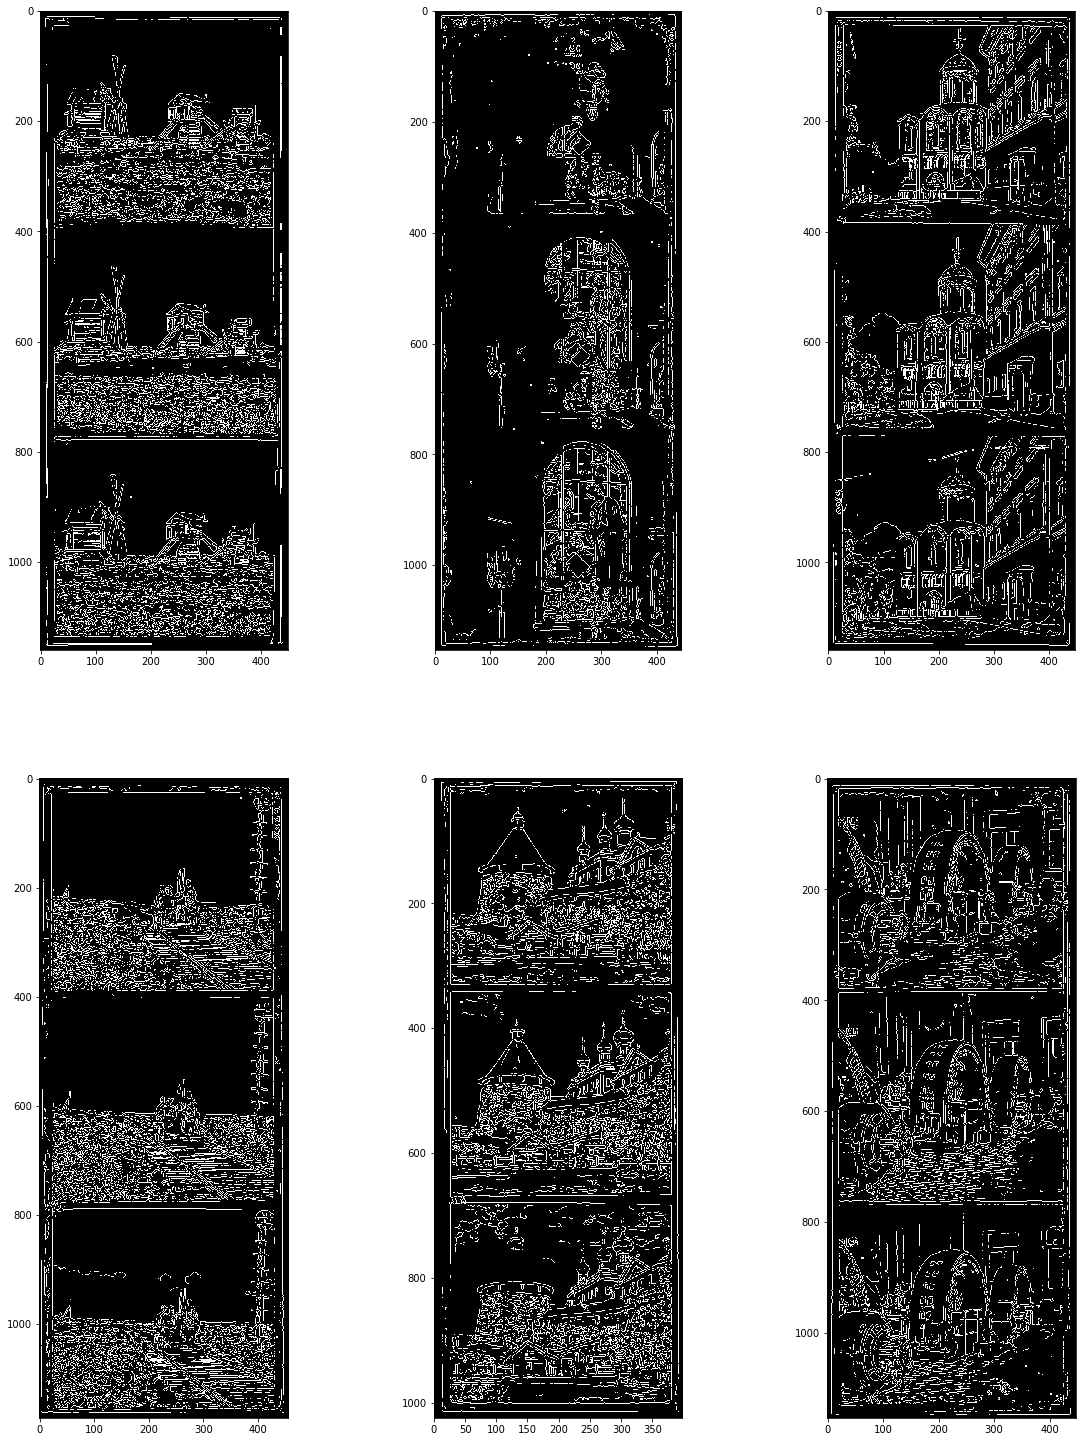

In [0]:
from  skimage.feature import canny
from scipy import signal
def Canny_detector(img):
    FG  = np.random.normal(0,1.4,size=(5,5))
    F_G = FG/FG.sum()
    gau_img = signal.convolve2d(img,F_G,mode='same')
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)  
    return canny(img)


canny_imgs = []
for img in plates:
    canny_img = Canny_detector(img)
    canny_imgs.append(canny_img)
    
visualize(canny_imgs, 'gray')

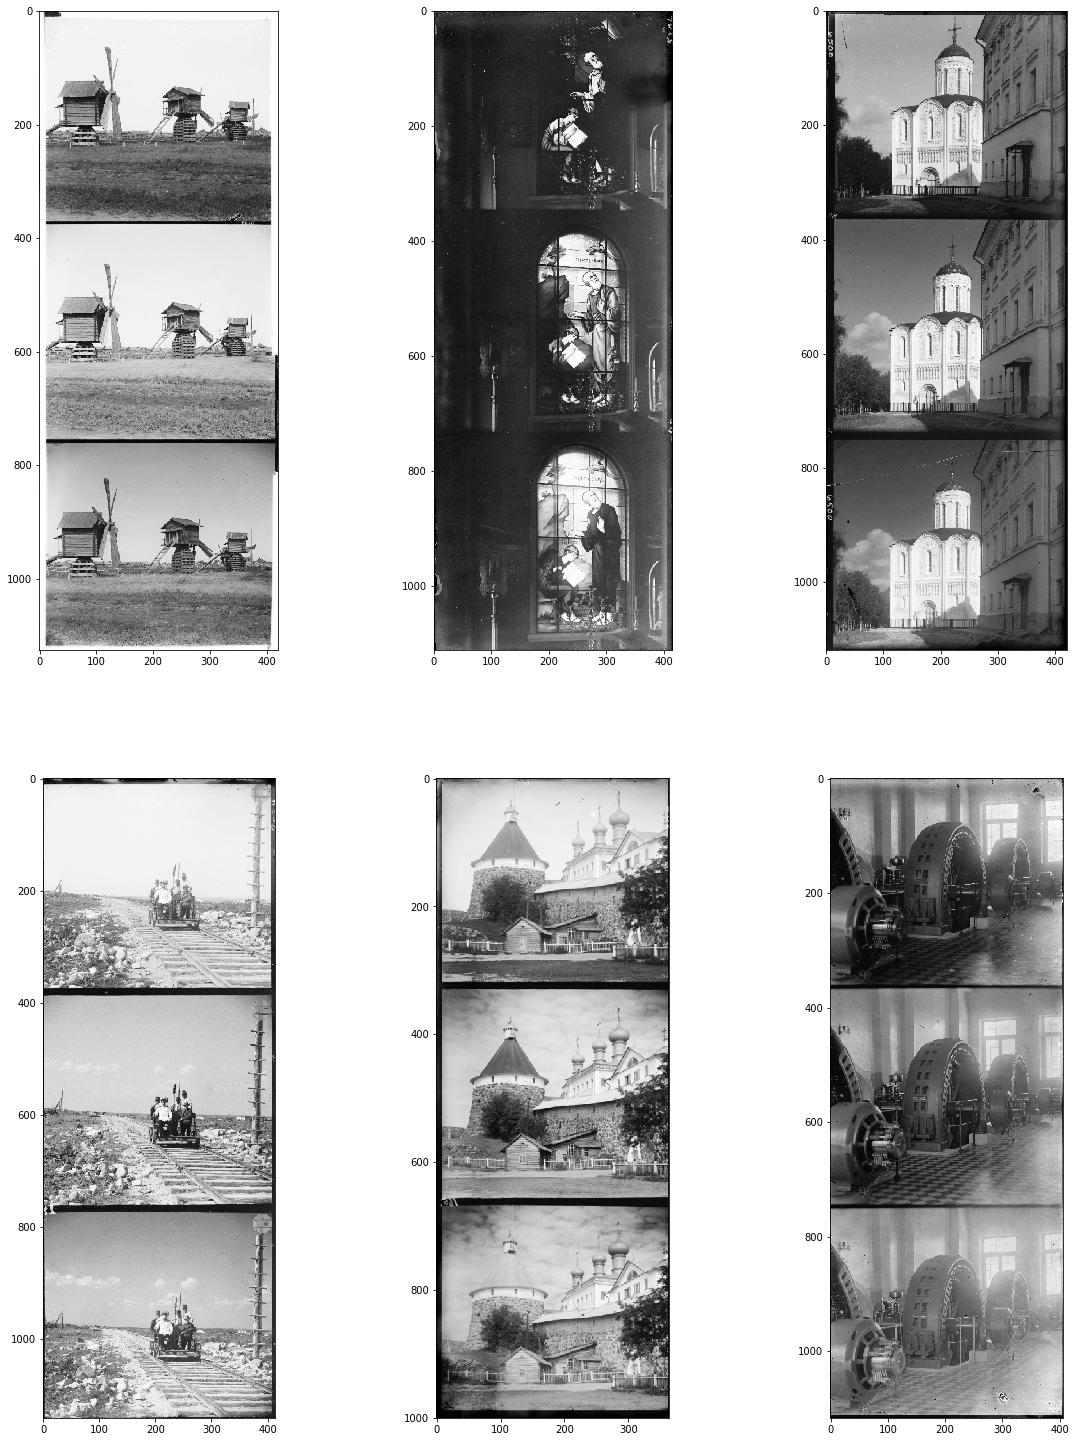

In [0]:
def remove_borders(img, canny_img):
    dx = int(img.shape[1] * 0.05) 
    x = canny_img.sum(axis=0)
    y = canny_img.sum(axis=1)
    z = np.where(x > np.percentile(x, 90))[0]
    t = np.where(y > np.percentile(y, 90))[0]
    dx_left = max(z[z <= dx])
    dy_top = max(t[t <= dx])
     
    return img[dy_top : -dy_top, dx_left: -dx_left]


cropped_imgs = []
#crop borders
for i, img in enumerate(plates):
    cropped_imgs.append(remove_borders(img, canny_imgs[i]))

visualize(cropped_imgs, 'gray')

#### Color of image

The next step is to separate the image into three channels (R ,G ,B) and make one colored picture. 

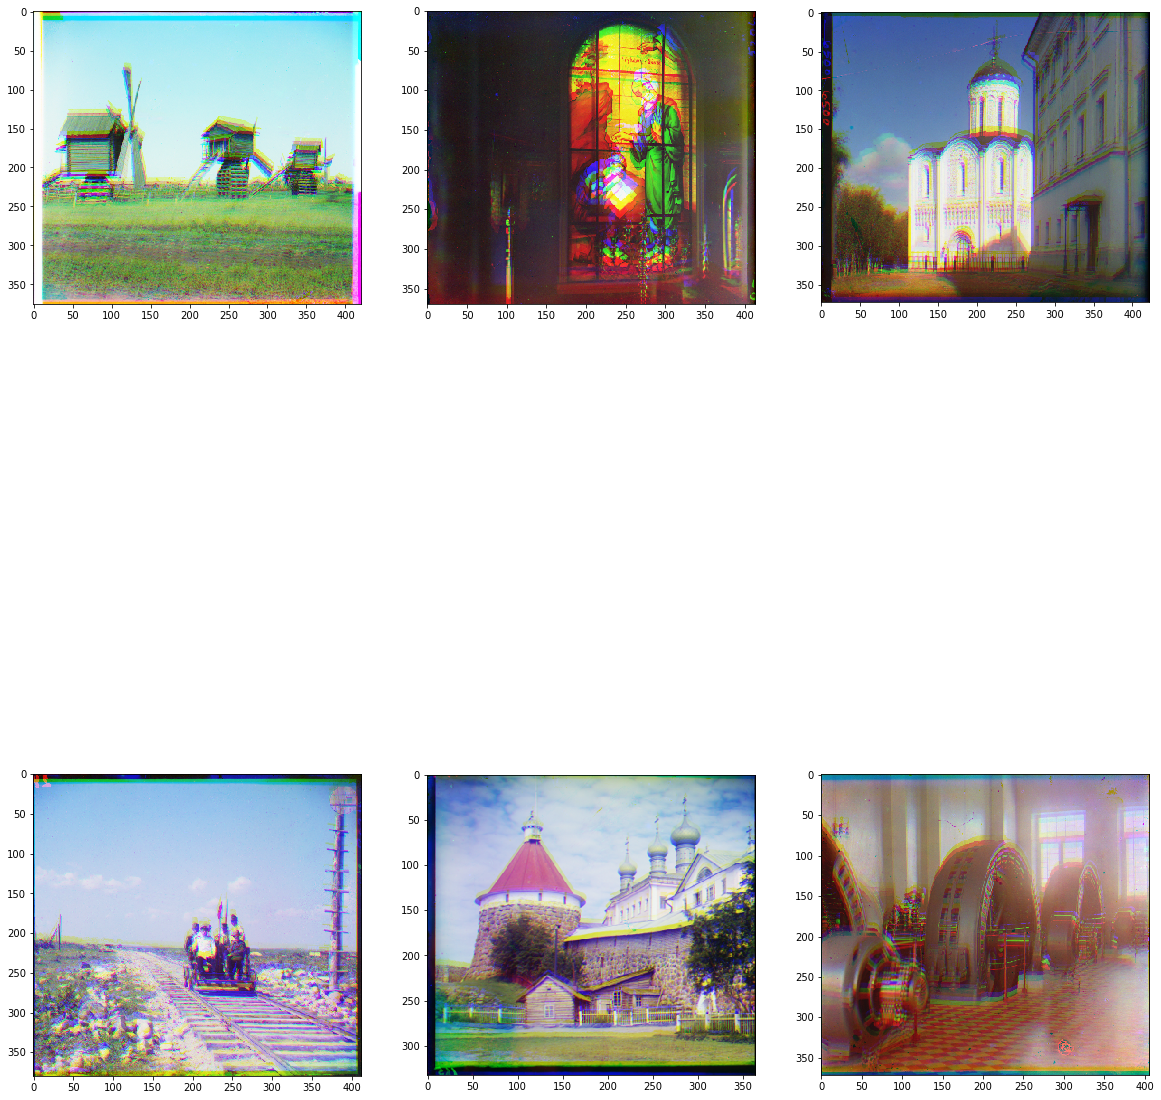

In [0]:
def impose_components(img):
    h = img.shape[0] // 3 
    
    new_img =  np.zeros( (h, img.shape[1],3) ,dtype=np.int32  ) 
    new_img[:,:,0] = img[2*h : 3*h, :]
    new_img[:,:,1] = img[h : 2*h, :]
    new_img[:,:,2] = img[0 : h, :]
   
    return new_img 
    pass


rgb_imgs = []
for cropped_img in cropped_imgs:
    rgb_img = impose_components(cropped_img)
    rgb_imgs.append(rgb_img)

visualize(rgb_imgs)

#### Search for the best color  of image  

 

* *Mean squared error (MSE):*<br><br>
$$ MSE(I_1, I_2) = \dfrac{1}{w * h}\sum_{x,y}(I_1(x,y)-I_2(x,y))^2, $$<br> where *w, h* are width and height of the images, respectively. To find the optimal shift   should find the minimum MSE over all the shift values.
    <br><br>
* *Normalized cross-correlation (CC):*<br><br>
    $$
    I_1 \ast I_2 = \dfrac{\sum_{x,y}I_1(x,y)I_2(x,y)}{\sum_{x,y}I_1(x,y)\sum_{x,y}I_2(x,y)}.
    $$<br>
     

In [0]:
def mse(X, Y):
    return np.mean((X - Y)**2)
   
    pass

def cor(X, Y):
    return np.sum(X*Y) / (np.sum(X)*np.sum(Y))  
    pass

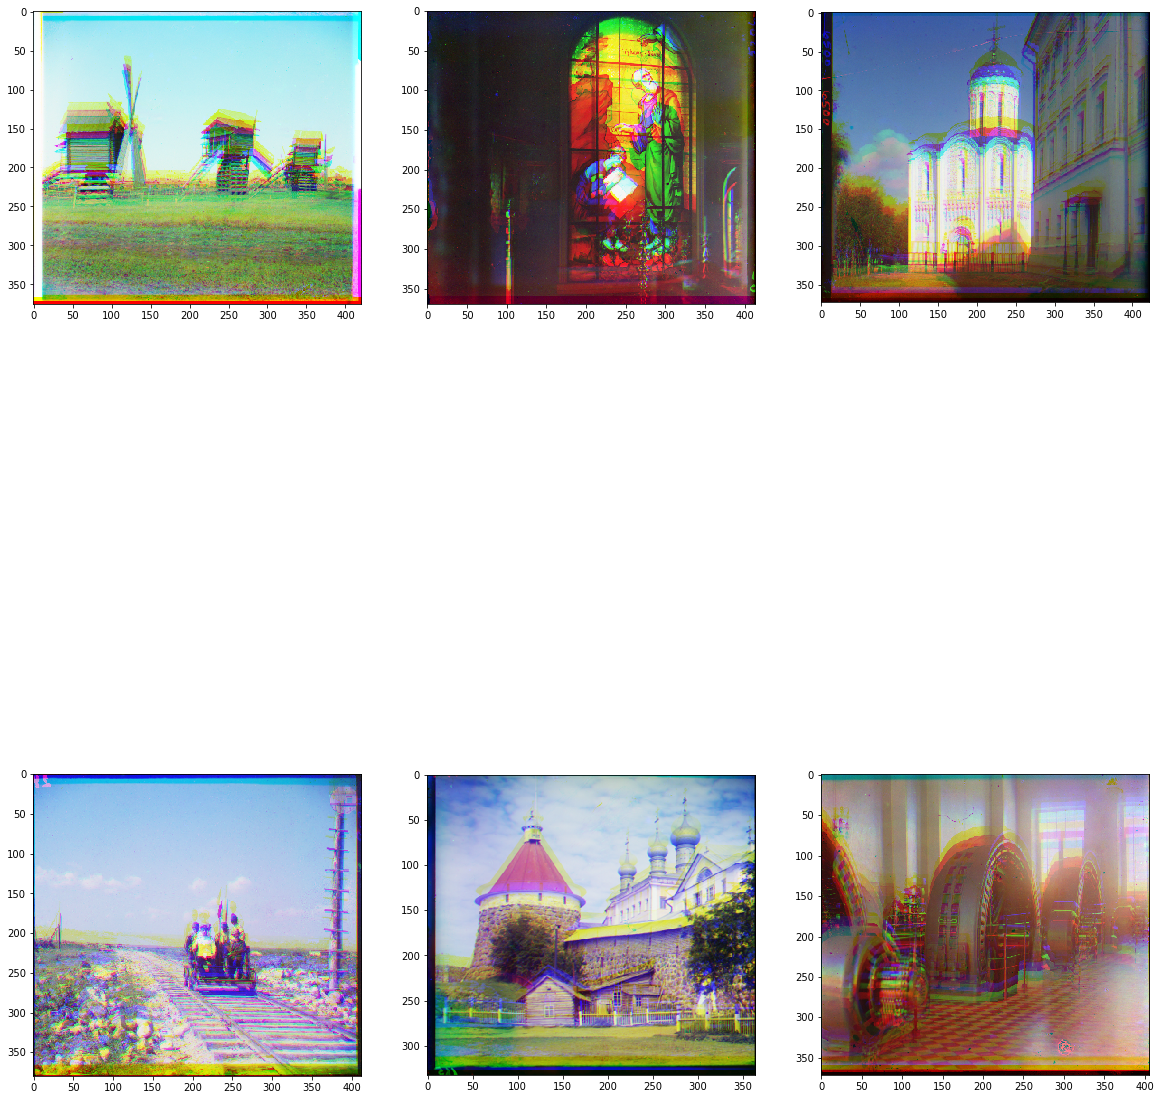

In [0]:
def shift(channel1, channel2, direction):
    if direction == 0:
        return channel1, channel2
    if direction > 0:
        return channel1[:-direction], channel2[direction:]
    if direction < 0:
        return channel1[-direction:], channel2[:direction]
def get_best_shift(channel1, channel2):
    threshold = mse(channel1, channel2)
    j = 0
    for i in range(-15, 16):
        img1, img2 = shift(channel1, channel2, i)
        score = mse(img1, img2)
        if score < threshold:
            threshold = score
            j = i
    return j   
    pass


def get_best_image(rgb_img):
    img = np.ones(rgb_img.shape, dtype=np.int32)
    img[..., 0] = rgb_img[..., 0]
    shift1 = get_best_shift(rgb_img[..., 0], rgb_img[..., 1])
    img[..., 1] = ndimage.shift(rgb_img[..., 1], shift=[shift1, 0])
    shift2 = get_best_shift(rgb_img[..., 0], rgb_img[..., 2])
    img[..., 2] = ndimage.shift(rgb_img[..., 2], shift=[shift2, 0])
    return img
    pass



final_imgs = []
for img in rgb_imgs:
    final_img = get_best_image(img)
    final_imgs.append(final_img)

visualize(final_imgs)